# Project 1: Relationship of Terrorist network.


## Students

* Team: 29
* Students: Nicolas Bollier, Enea Figini, Axel Nilsson, Elias Le Boudec
* Dataset: Terrorist Relations

![Alt text](img/friends.png)

## Objective

To What extent is a network of terrorists similar to a social network?

In [32]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from scipy import sparse
import matplotlib.patches as mpatches

### Loading the reference data

In [7]:
adjacency = np.load('adjacency_matrix.npy')

In [27]:
data = np.load('data.npy')

labels_raw = data[:,-4:]
labels = ((labels_raw[:,0] == 'colleague' )*1)+\
         ((labels_raw[:,1] == 'congregate')*2)+\
         ((labels_raw[:,2] == 'contact'   )*3)+\
         ((labels_raw[:,3] == 'family'    )*4)

colors     = ['red', 'blue', 'yellow', 'black']
node_color = []

for i in range(len(labels)):
    node_color.append(colors[labels[i]-1])
    

### First visualization of the reference data

In [50]:
graph = nx.from_scipy_sparse_matrix(sparse.csr_matrix(adjacency))

coords = nx.spring_layout(graph, k=.15, seed=3, iterations=100)

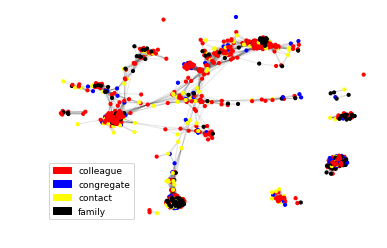

In [52]:
nx.draw_networkx_nodes(graph, coords, node_size=10, 
                       node_alpha=.2,node_color=node_color)
nx.draw_networkx_edges(graph, coords, alpha=0.1)
coll_patch  = mpatches.Patch(color=colors[0], label='colleague')
cong_patch  = mpatches.Patch(color=colors[1], label='congregate')
cont_patch  = mpatches.Patch(color=colors[2], label='contact')
fami_patch  = mpatches.Patch(color=colors[3], label='family')
plt.legend(handles=[coll_patch, cong_patch, cont_patch, fami_patch], loc=3, prop={'size': 9})
plt.axis('off')
plt.savefig('pics/graphRel.png', dpi = 250)
pass